In [1]:
import os
import json
import random
import numpy as np
import pandas as pd
import tensorflow.keras as keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import confusion_matrix
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.FATAL)

In [2]:
mfcc_path = '../data/processed/13_mfcc_5_test.json'

In [3]:
def load_data(data_path, target_labels):
    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data[target_labels]).astype(int)
    
    print("Data successfully loaded!")

    return X, y

In [4]:
X, y = load_data(data_path=mfcc_path, target_labels='subclass_label')

Data successfully loaded!


In [5]:
model = tf.keras.models.load_model('../models/baseline_multiclass_mlp_mfcc/my_model')

# Check its architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2808)              0         
                                                                 
 batch_normalization (Batch  (None, 2808)              11232     
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 128)               359552    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                        

In [6]:
model.evaluate(X, y, batch_size=260, verbose=2)

2/2 - 0s - loss: 1.1343 - sparse_categorical_accuracy: 0.7352 - 210ms/epoch - 105ms/step


[1.1342501640319824, 0.7351694703102112]

In [7]:
y_pred = model.predict(X).argmax(axis=-1)

15/15 [==============================] - 0s 1ms/step


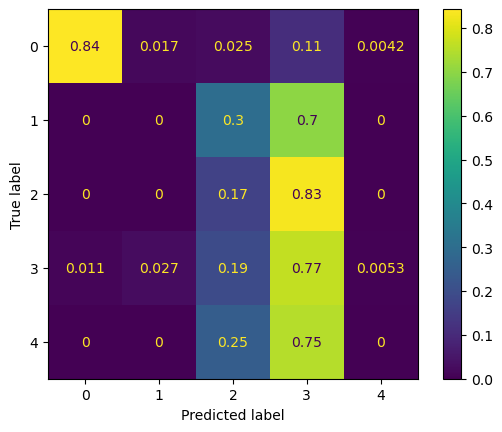

In [8]:
ConfusionMatrixDisplay.from_predictions(y, y_pred, normalize='true')

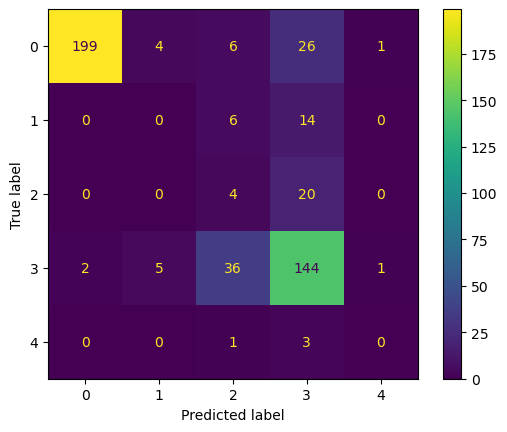

In [9]:
ConfusionMatrixDisplay.from_predictions(y, y_pred)